<a href="https://colab.research.google.com/github/bala-codes/CHATBOT-WITH-ML-BASED-INTENT-CLASSIFICATION/blob/master/codes/1.%20CHATBOT%20TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random, string
import json
import pandas as pd
!pip install nltk
import nltk

You should consider upgrading via the 'c:\users\elcot\appdata\local\programs\python\python36-32\python.exe -m pip install --upgrade pip' command.


In [ ]:
with open('basic-chats.json', 'r') as f:
    intents = json.load(f)
col1 = []
col2 = []
for intent in intents['intents']:
    tag = intent['tag']
    for pattern in intent['patterns']:
        col1.append(pattern)
        col2.append(tag)

df= pd.DataFrame()
df['text'] = col1
df['category'] = col2
print(df)
df.to_csv('train-chat1.csv',index=False)
print(df.shape)

                                                text     category
0                                                 Hi     greeting
1                                                Hey     greeting
2                                        How are you     greeting
3                                   Is anyone there?     greeting
4                                              Hello     greeting
5                                  Hello how are you     greeting
6                                   Hi how do you do     greeting
7                                           Good day     greeting
8                                                Bye      goodbye
9                                      See you later      goodbye
10                                           Goodbye      goodbye
11                                    Alright thanks      goodbye
12                                            Thanks       thanks
13                                         Thank you       thanks
14        

In [ ]:
all_punctuations = string.punctuation + '‘’,:”][],' 

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

def text_cleaner(raw):
    cleaned_text = punc_remover(raw.lower())
    return cleaned_text

In [ ]:
df['text_cleaned'] = df['text'].apply(text_cleaner)
df

,text,category,text_cleaned
0,Hi,greeting,hi
1,Hey,greeting,hey
2,How are you,greeting,how are you
3,Is anyone there?,greeting,is anyone there
4,Hello,greeting,hello
5,Hello how are you,greeting,hello how are you
6,Hi how do you do,greeting,hi how do you do
7,Good day,greeting,good day
8,Bye,goodbye,bye
9,See you later,goodbye,see you later


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'],df['category'],test_size=0.28,shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25,) (10,) (25,) (10,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)

# NAIVE BAYES CLASSIFIER

In [ ]:
#USING NAIVE BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB(alpha=0.1)

nb_classifier.fit(tfidf_train,y_train)
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['appointment', 'confirm', 'goodbye', 'greeting', 'payments', 'thanks', 'unknown'])
print(cm)

Score from TFIDF Vectorizer 40.0 %
[[2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 2 0 0 2 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)
scores = []

# Define train_and_predict()
def train_and_predict(alpha):

    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.5

Alpha:  0.1
Score:  0.4

Alpha:  0.2
Score:  0.4

Alpha:  0.30000000000000004
Score:  0.4

Alpha:  0.4
Score:  0.4

Alpha:  0.5
Score:  0.4

Alpha:  0.6000000000000001
Score:  0.4

Alpha:  0.7000000000000001
Score:  0.3

Alpha:  0.8
Score:  0.3

Alpha:  0.9
Score:  0.3



c:\users\elcot\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


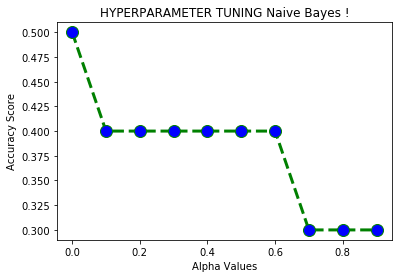

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Naive Bayes !') 
plt.show() 

# BERNOULLI BAYES

In [ ]:
#USING Bernoulli BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bb_classifier = BernoulliNB(alpha=0.0)

bb_classifier.fit(tfidf_train,y_train)
pred = bb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['appointment', 'confirm', 'goodbye', 'greeting', 'payments', 'thanks', 'unknown'])
print(cm)

Score from TFIDF Vectorizer 70.0 %
[[2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]]


c:\users\elcot\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)
scores = []

# Define train_and_predict()
def train_and_predict(alpha):

    bb_classifier = BernoulliNB(alpha=alpha)
    bb_classifier.fit(tfidf_train, y_train)
    pred = bb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.7

Alpha:  0.1
Score:  0.8

Alpha:  0.2
Score:  0.8

Alpha:  0.30000000000000004
Score:  0.8

Alpha:  0.4
Score:  0.8

Alpha:  0.5
Score:  0.7

Alpha:  0.6000000000000001
Score:  0.7

Alpha:  0.7000000000000001
Score:  0.7

Alpha:  0.8
Score:  0.6

Alpha:  0.9
Score:  0.6



c:\users\elcot\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


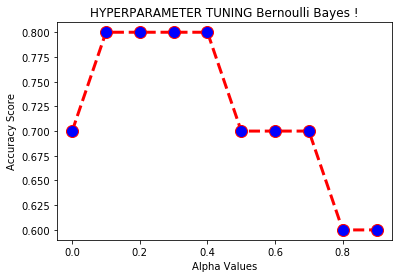

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Bernoulli Bayes !') 
plt.show() 

# PASSIVE AGGRESSIVE CLASSIFIER

In [ ]:
#USING PASSIVE AGGRESSIVE MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

PA_classifier = PassiveAggressiveClassifier(max_iter=200)

PA_classifier.fit(tfidf_train,y_train)
pred = PA_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['appointment', 'confirm', 'goodbye', 'greeting', 'payments', 'thanks', 'unknown'])
print(cm)

Score from TFIDF Vectorizer 88.889 %
[[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]
scores = []
# Define train_and_predict()
def train_and_predict(alpha):

    PA_classifier = PassiveAggressiveClassifier(max_iter=alpha)
    PA_classifier.fit(tfidf_train, y_train)
    pred = PA_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  50
Score:  0.7777777777777778

Alpha:  100
Score:  0.8888888888888888

Alpha:  150
Score:  0.7777777777777778

Alpha:  200
Score:  0.8888888888888888

Alpha:  250
Score:  0.7777777777777778

Alpha:  300
Score:  0.8888888888888888

Alpha:  350
Score:  0.8888888888888888

Alpha:  400
Score:  0.7777777777777778

Alpha:  450
Score:  0.7777777777777778

Alpha:  500
Score:  0.7777777777777778

Alpha:  600
Score:  0.8888888888888888

Alpha:  700
Score:  0.7777777777777778

Alpha:  800
Score:  0.7777777777777778

Alpha:  900
Score:  0.8888888888888888

Alpha:  1000
Score:  0.7777777777777778



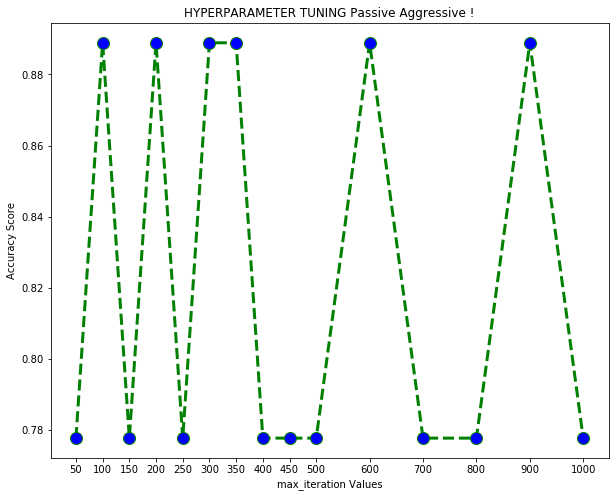

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.figure(figsize=(10,8))
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('max_iteration Values') 
plt.ylabel('Accuracy Score')
plt.xticks((50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000))
plt.title('HYPERPARAMETER TUNING Passive Aggressive !') 
plt.show() 

# STOCHASTIC GRADIENT DESCENT CLASSIFIER

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import SGDClassifier
from sklearn import metrics

SGD_classifier = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGD_classifier.fit(tfidf_train,y_train)
pred = SGD_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,  labels=['appointment', 'confirm', 'goodbye', 'greeting', 'payments', 'thanks', 'unknown'])
print(cm)

Score from TFIDF Vectorizer 88.889 %
[[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [ ]:
# Run this code once to get the best parameters for SGD Classifier amd use the parameters later. Run this code again only if you are changing the dataset, otherwise stick with the next block of code.
# SGD classifier - finding best parameters using Grid Search CV
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "max_iter" : [5, 10, 20, 50, 100, 1000]
}

model = SGDClassifier()
SGD_classifier = GridSearchCV(model, param_grid=params)
SGD_classifier.fit(tfidf_train, y_train)

print(SGD_classifier.best_score_)
print(SGD_classifier.best_estimator_)   

c:\users\elcot\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\elcot\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.64
SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_classifier = LogisticRegression(C=1000)

logreg_classifier.fit(tfidf_train,y_train)
pred = logreg_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['appointment', 'confirm', 'goodbye', 'greeting', 'payments', 'thanks', 'unknown'])
print(cm)

Score from TFIDF Vectorizer 77.778 %
[[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [ ]:
import numpy as np

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores = []
# Define train_and_predict()
def train_and_predict(C):

    logreg_classifier = LogisticRegression(C=C)
    logreg_classifier.fit(tfidf_train, y_train)
    pred = logreg_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()

C value:  0.001
Score:  0.2222222222222222

C value:  0.01
Score:  0.2222222222222222

C value:  0.1
Score:  0.4444444444444444

C value:  1
Score:  0.5555555555555556

C value:  10
Score:  0.7777777777777778

C value:  100
Score:  0.7777777777777778

C value:  1000
Score:  0.7777777777777778



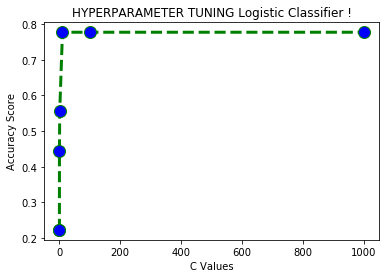

In [ ]:
import matplotlib.pyplot as plt 

x = C
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('C Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Logistic Classifier !') 
plt.show() 

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_classifier = RandomForestClassifier(n_estimators = 100)

rf_classifier.fit(tfidf_train,y_train)
pred = rf_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("\nScore from TFIDF Vectorizer + Random Forest :", round(score*100,3) ,"%\n")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels = ['appointment', 'confirm', 'goodbye', 'greeting', 'payments', 'thanks', 'unknown'])
print(cm)


Score from TFIDF Vectorizer + Random Forest : 66.667 %

[[0 0 0 1 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [ ]:
# Create the list of alphas: trees for tfidf
import numpy as np

trees = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]
scores = []
# Define train_and_predict()
def train_and_predict(alpha):

    rf_classifier = RandomForestClassifier(n_estimators=alpha)
    rf_classifier.fit(tfidf_train, y_train)
    pred = rf_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for tree in trees:
    print('Alpha: ', tree)
    print('Score: ', train_and_predict(tree))
    print()

Alpha:  50
Score:  0.6666666666666666

Alpha:  100
Score:  0.6666666666666666

Alpha:  150
Score:  0.6666666666666666

Alpha:  200
Score:  0.6666666666666666

Alpha:  250
Score:  0.6666666666666666

Alpha:  300
Score:  0.6666666666666666

Alpha:  350
Score:  0.6666666666666666

Alpha:  400
Score:  0.6666666666666666

Alpha:  450
Score:  0.6666666666666666

Alpha:  500
Score:  0.6666666666666666

Alpha:  600
Score:  0.6666666666666666

Alpha:  700
Score:  0.5555555555555556

Alpha:  800
Score:  0.6666666666666666

Alpha:  900
Score:  0.6666666666666666

Alpha:  1000
Score:  0.6666666666666666



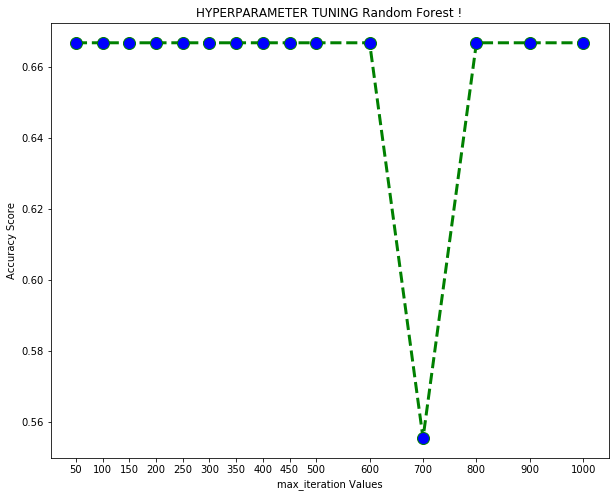

In [ ]:
import matplotlib.pyplot as plt 

x = list(trees)
y = scores 

# plotting the points 
plt.figure(figsize=(10,8))
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('max_iteration Values') 
plt.ylabel('Accuracy Score')
plt.xticks((50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000))
plt.title('HYPERPARAMETER TUNING Random Forest !') 
plt.show() 

## SO FROM THE ABOVE RESULTS FOR THE CHATBOT , IT SEEMS ONLY PASSIVE AGGRESSIVE CLASSIFIER AND SGD CLASSIFIER PROVIDES ATLEAST 75% ACCURACY WHEN COMPARED TO OTHERS.

## LET'S USE THEM BOTH AND GET THE MEAN SCORE OUT OF THEM

In [ ]:
import pickle

with open("pac_chatbot_classifier.pkl","wb") as fout:
    pickle.dump((tfidf_vectorizer, PA_classifier), fout) 

with open("sgd_chatbot_classifier.pkl","wb") as fout:
    pickle.dump((tfidf_vectorizer, SGD_classifier), fout) 

In [ ]:
from scipy.stats.mstats import mode
import numpy as np

def ensemble(x):
    pred1 = PA_classifier._predict_proba_lr(x)
    pred2 = SGD_classifier.predict_proba(x)
    
    test_pred_prob = np.mean([pred1, pred2], axis=0)
    print("Test_Pred_Prob",test_pred_prob)
    pred = np.argmax(test_pred_prob, axis=1)
    return pred

pred = []
pred = ensemble(tfidf_test)
pred = np.array(pred)
print()
print(pred)

Test_Pred_Prob [[0.07092413 0.63440866 0.05076774 0.06373983 0.06409051 0.05206761
  0.06400153]
 [0.0529966  0.06432669 0.07202907 0.05434378 0.05180942 0.64891576
  0.05557868]
 [0.47944172 0.04766772 0.06433608 0.21592339 0.06171704 0.06319866
  0.06771539]
 [0.06238997 0.09012603 0.06444706 0.1087017  0.08752439 0.07365189
  0.51315895]
 [0.06053036 0.64450287 0.04665738 0.06183361 0.0642528  0.06105509
  0.06116789]
 [0.04388514 0.06175752 0.05376763 0.64904252 0.06958549 0.06661494
  0.05534676]
 [0.08206079 0.04503672 0.09186527 0.21776702 0.23767047 0.1130397
  0.21256003]
 [0.10546495 0.45977266 0.08376612 0.08901507 0.08935814 0.08445364
  0.08816942]
 [0.13879811 0.14030387 0.14820558 0.15492527 0.13836586 0.1423825
  0.13701881]]

[1 5 0 6 1 3 4 1 3]


In [ ]:
y_test = y_test.replace(to_replace = ['appointment', 'confirm', 'goodbye', 'greeting', 'payments', 'thanks', 'unknown'], value=[0,1,2,3,4,5,6])

In [ ]:
score = metrics.accuracy_score(y_test,pred)
print("Score from ENSEMBLE", round(score*100,3) ,"%")

Score from ENSEMBLE 88.889 %
